# ARMA

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import scipy.stats as stats
from pmdarima import auto_arima
import datetime

palettename = "ch:start=.2,rot=-.3"
palette = sns.color_palette(palettename, 10)
palette = palette.as_hex()
sns.set_palette(palette.reverse())
col1 = palette[8]
col2 = palette[5]
col3 = palette[2]
cols = [col1, col2, col3]
palette

['#27213f',
 '#37355d',
 '#454b78',
 '#52628f',
 '#5f79a3',
 '#6d90b2',
 '#7da7c0',
 '#91bccc',
 '#a8d0d7',
 '#c3e2e3']

In [62]:
data = pd.read_csv('../Data/final_data.csv')
data

,date,price,1_hour_pred,2_hour_pred,3_hour_pred,market_demand,ontario_demand,1_lag_pred,2_lag_pred,3_lag_pred
0,2020-01-01 01:00:00,0.00,0.00,0.00,0.00,16565,13219,NaN,NaN,NaN
1,2020-01-01 02:00:00,0.00,0.00,0.00,0.00,16193,12895,0.00,NaN,NaN
2,2020-01-01 03:00:00,0.00,0.00,0.00,0.00,16072,12554,0.00,0.00,NaN
3,2020-01-01 04:00:00,0.00,0.00,0.00,-0.02,15930,12360,0.00,0.00,0.00
4,2020-01-01 05:00:00,0.00,0.00,0.00,-0.10,15963,12353,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
26683,2023-01-16 20:00:00,14.39,36.07,37.53,39.73,20792,18522,38.62,53.01,38.62
26684,2023-01-16 21:00:00,14.37,33.86,36.71,38.96,20440,18195,36.07,41.47,38.62
26685,2023-01-16 22:00:00,12.95,35.12,35.41,35.77,19721,17536,33.86,37.53,42.13
26686,2023-01-16 23:00:00,9.10,33.08,33.64,32.22,18891,16534,35.12,36.71,39.73


In [63]:
# data = data.rename({'Date': 'date', 'Price':'price', 'Market Demand': "market_demand", 'Ontario Demand': 'ontario_demand'}, axis = 1)
# data.to_csv('../Data/final_data.csv', index = False)

In [64]:
df = data[['date', 'price', '1_hour_pred', '2_hour_pred', '3_hour_pred', 'ontario_demand']]
df = df.set_index('date')
df

,price,1_hour_pred,2_hour_pred,3_hour_pred,ontario_demand
date,,,,,
2020-01-01 01:00:00,0.00,0.00,0.00,0.00,13219
2020-01-01 02:00:00,0.00,0.00,0.00,0.00,12895
2020-01-01 03:00:00,0.00,0.00,0.00,0.00,12554
2020-01-01 04:00:00,0.00,0.00,0.00,-0.02,12360
2020-01-01 05:00:00,0.00,0.00,0.00,-0.10,12353
...,...,...,...,...,...
2023-01-16 20:00:00,14.39,36.07,37.53,39.73,18522
2023-01-16 21:00:00,14.37,33.86,36.71,38.96,18195
2023-01-16 22:00:00,12.95,35.12,35.41,35.77,17536


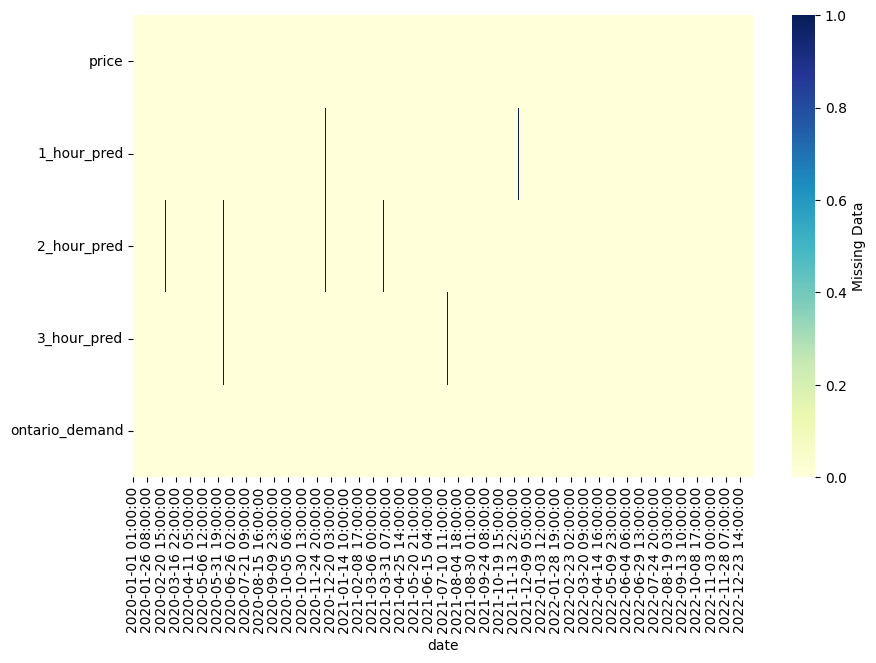

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'});

In [66]:
y = df.ontario_demand
y

date
2020-01-01 01:00:00    13219
2020-01-01 02:00:00    12895
2020-01-01 03:00:00    12554
2020-01-01 04:00:00    12360
2020-01-01 05:00:00    12353
                       ...  
2023-01-16 20:00:00    18522
2023-01-16 21:00:00    18195
2023-01-16 22:00:00    17536
2023-01-16 23:00:00    16534
2023-01-17 00:00:00    15630
Name: ontario_demand, Length: 26688, dtype: int64

In [67]:
train = y[y.index < '2022']
train

date
2020-01-01 01:00:00    13219
2020-01-01 02:00:00    12895
2020-01-01 03:00:00    12554
2020-01-01 04:00:00    12360
2020-01-01 05:00:00    12353
                       ...  
2021-12-31 19:00:00    16870
2021-12-31 20:00:00    16046
2021-12-31 21:00:00    15529
2021-12-31 22:00:00    15112
2021-12-31 23:00:00    14596
Name: ontario_demand, Length: 17543, dtype: int64

In [68]:
valid = y[(y.index >= '2022') & (y.index < '2023')]
valid

date
2022-01-01 00:00:00    14070
2022-01-01 01:00:00    13543
2022-01-01 02:00:00    13254
2022-01-01 03:00:00    12683
2022-01-01 04:00:00    12491
                       ...  
2022-12-31 19:00:00    16381
2022-12-31 20:00:00    15834
2022-12-31 21:00:00    15465
2022-12-31 22:00:00    15086
2022-12-31 23:00:00    14453
Name: ontario_demand, Length: 8760, dtype: int64

In [69]:
# train.plot()
# valid.plot();

In [70]:
model = auto_arima(train, start_p=0, start_q=0, test="adf", trace=True, seasonal=True, m = 12, maxiter = 10, method = 'nm', stepwise = True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=342487.367, Time=4.72 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=322936.607, Time=0.62 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=4.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=351618.402, Time=4.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=387988.495, Time=0.20 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=3.79 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=331011.345, Time=3.93 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=272711.348, Time=0.49 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=276892.377, Time=4.29 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=283731.495, Time=4.13 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=251512.393, Time=0.71 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=4.47 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=263986.572, Time=4.38 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=327863.399, Time=4.63 sec
 ARIMA(3,0,0

ARIMA(maxiter=10, method='nm', order=(5, 0, 0), scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True)

In [71]:
model

ARIMA(maxiter=10, method='nm', order=(5, 0, 0), scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True)

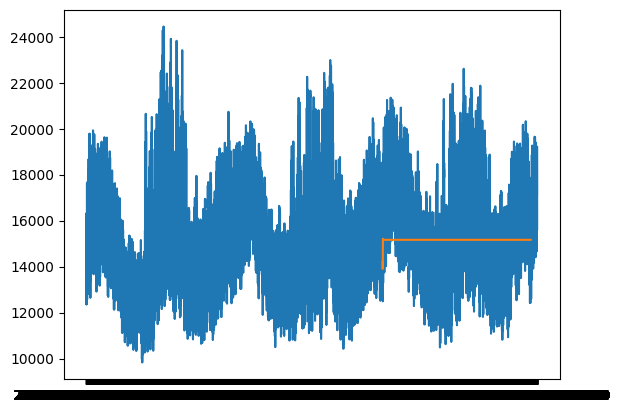

In [72]:
start_index = valid.index.min()
end_index = valid.index.max()

pred = model.predict(n_periods=len(valid))
pred = pd.DataFrame(pred,index = valid.index,columns=['Prediction'])

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

# Plot the predictions for validation set
plt.plot(y, label='Train')
plt.plot(forecast, label='Prediction')
plt.show()

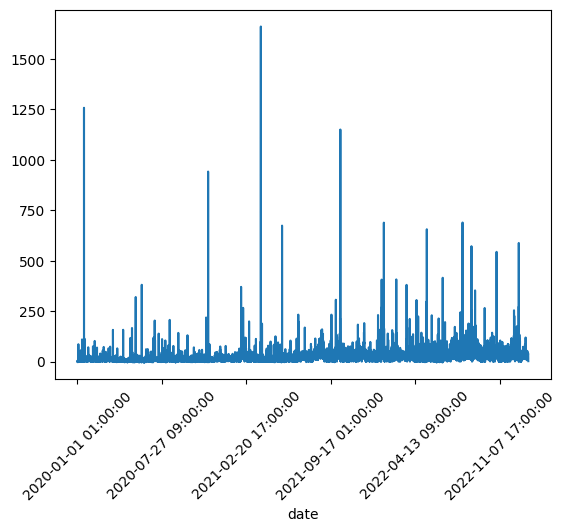

In [73]:
df.price.plot()
plt.xticks(rotation=45);

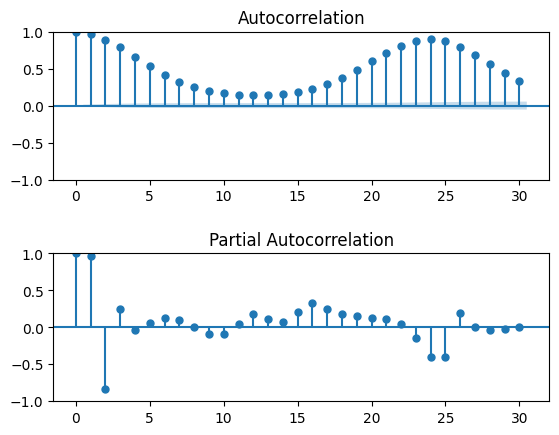

In [74]:
def acf2(ts):
    plt.figure()
    plt.subplot(211)
    plot_acf(ts, ax=plt.gca(), lags = 30)
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(212)
    plot_pacf(ts, ax=plt.gca(), lags = 30, method = 'ywm')
    plt.show()

acf2(df.ontario_demand)

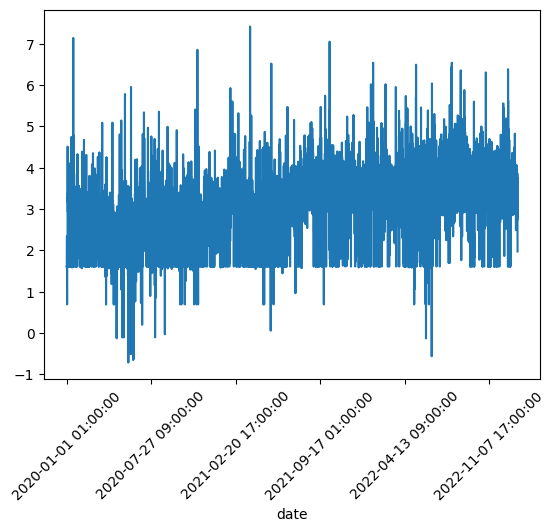

In [75]:
price_shifted = df.price + 5
price_log = np.log(price_shifted)
price_log.plot()
plt.xticks(rotation=45);

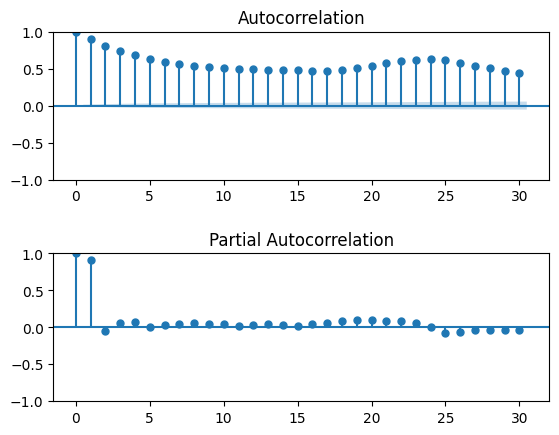

In [76]:
acf2(price_log)

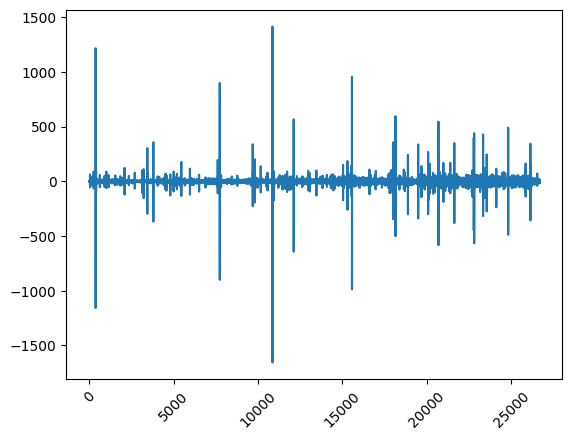

In [77]:
price_dif1 = np.diff(df.price)
plt.plot(price_dif1)
plt.xticks(rotation=45);

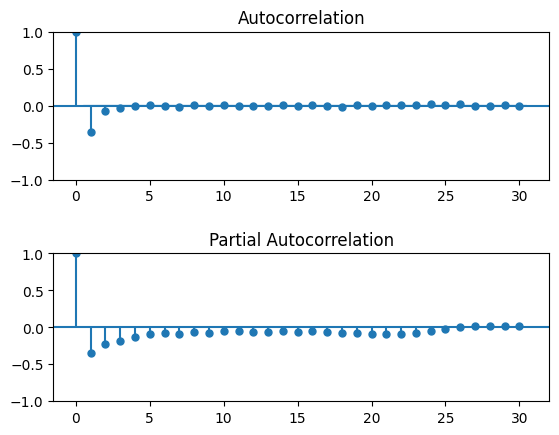

In [78]:
acf2(price_dif1)

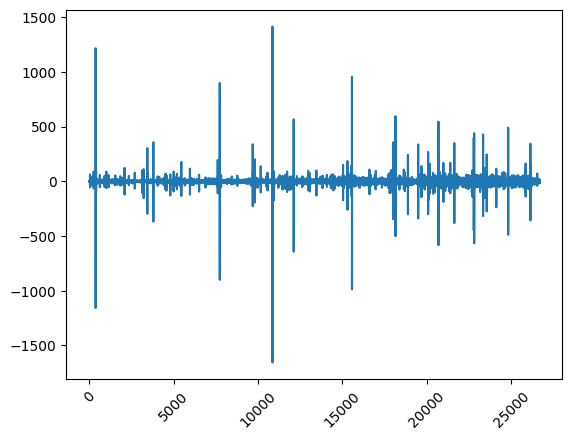

In [79]:
price_log_dif = np.diff(price_log)
plt.plot(price_dif1)
plt.xticks(rotation=45);

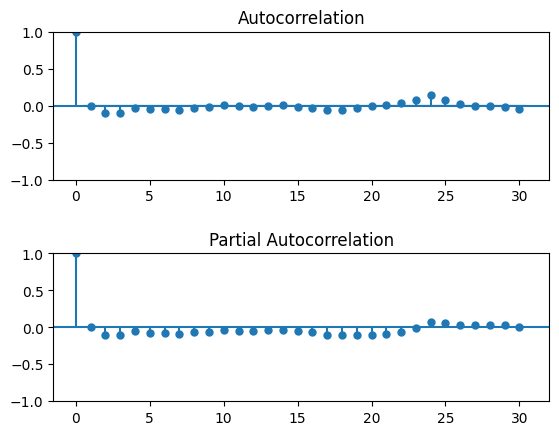

In [80]:
acf2(price_log_dif)